<a href="https://colab.research.google.com/github/Sharon20222/Cloud-Computing/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

# Set up matplotlib for inline plotting
%matplotlib inline

# Set plot style to 'ggplot'
plt.style.use('ggplot')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set default figure size
plt.rcParams['figure.figsize'] = (20.0, 10.0)


Create Synthetic data





In [23]:
num_points_each_cluster = 100
mu1 = [-0.4, 3]
covar1 = [[1.3, 0], [0, 1]]
mu2 = [0.5, 0.75]
covar2 = [[2.2, 1.2], [1.8, 2.1]]

x1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
x2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)
y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)

# Additional examples
mu3 = [2, 2]
covar3 = [[1.5, -1], [-1, 2]]
x3 = np.random.multivariate_normal(mu3, covar3, num_points_each_cluster)
y3 = np.ones(num_points_each_cluster) * 2

# Combining all data points and labels
x = np.vstack((x1, x2, x3))
y = np.hstack((y1, y2, y3))

print("Generated data:")
print("Class 1:", x1.shape)
print("Class 2:", x2.shape)
print("Class 3:", x3.shape)
print("Total data points:", x.shape[0])


Generated data:
Class 1: (100, 2)
Class 2: (100, 2)
Class 3: (100, 2)
Total data points: 300


Lets visualize this data

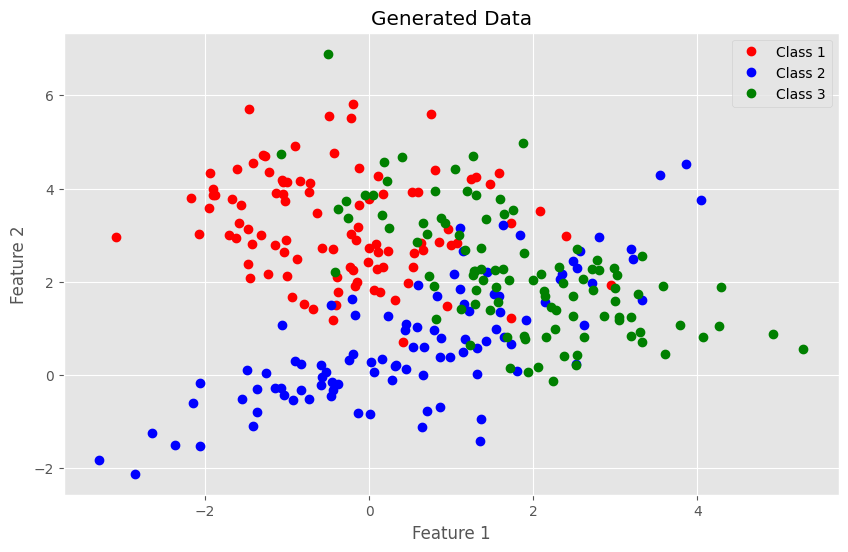

In [24]:
plt.figure(figsize=(10, 6))

# Plotting data points for all classes
plt.plot(x1[:, 0], x1[:, 1], 'ro', label='Class 1')
plt.plot(x2[:, 0], x2[:, 1], 'bo', label='Class 2')
plt.plot(x3[:, 0], x3[:, 1], 'go', label='Class 3')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
x = np.vstack((x1, x2, x3))
y = np.hstack((y1, y2, y3))
print("Shape of combined data and labels:", x.shape, y.shape)


Shape of combined data and labels: (300, 2) (300,)


In [16]:
x_tf = tf.constant(x)
y_tf = tf.constant(y)

Main logic for KNN

In [27]:
def predict(X_t, y_t, x_t, k_t):
    neg_one = tf.constant(-1.0, dtype=tf.float64)
    # we compute the L-1 distance
    distances =  tf.reduce_sum(tf.abs(tf.subtract(X_t, x_t)), 1)
    # to find the nearest points, we find the farthest points based on negative distances
    # we need this trick because tensorflow has top_k api and no closest_k or reverse=True api
    neg_distances = tf.multiply(distances, neg_one)
    # get the indices
    vals, indx = tf.nn.top_k(neg_distances, k_t)
    # slice the labels of these points
    y_s = tf.gather(y_t, indx)
    return y_s

def get_label(preds):
    counts = np.bincount(preds.astype('int64'))
    return np.argmax(counts)


Generate a test point

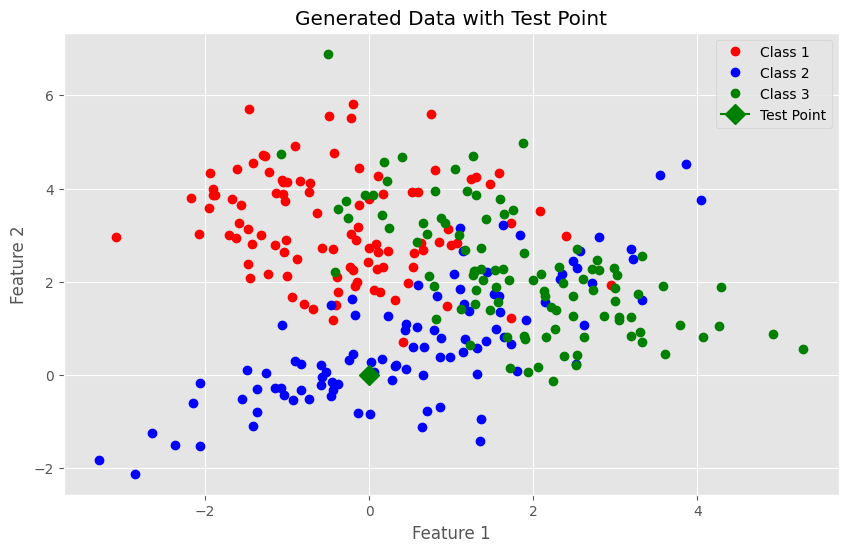

In [28]:
example = np.array([0, 0])
example_tf = tf.constant(example, dtype=tf.float64)

plt.figure(figsize=(10, 6))

# Plotting data points for all classes
plt.plot(x1[:, 0], x1[:, 1], 'ro', label='Class 1')
plt.plot(x2[:, 0], x2[:, 1], 'bo', label='Class 2')
plt.plot(x3[:, 0], x3[:, 1], 'go', label='Class 3')

# Plotting the test point
plt.plot(example[0], example[1], 'g', marker='D', markersize=10, label='Test Point')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data with Test Point')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
k_tf = tf.constant(3)
tf.compat.v1.disable_v2_behavior()

with tf.compat.v1.Session() as sess:
    pr = predict(x_tf, y_tf, example_tf, k_tf)
    y_index = sess.run(pr)
    print(get_label(y_index))



0


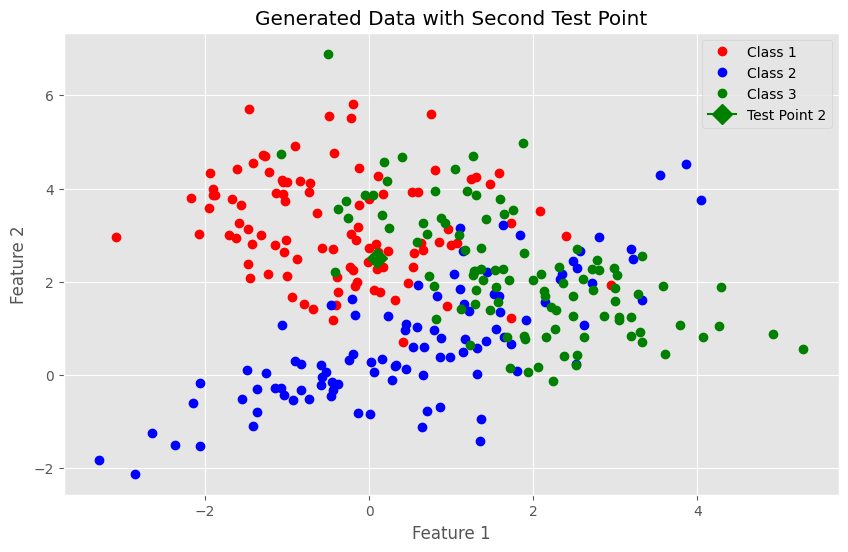

In [30]:
example_2 = np.array([0.1, 2.5])
example_2_tf = tf.constant(example_2)

plt.figure(figsize=(10, 6))

# Plotting data points for all classes
plt.plot(x1[:, 0], x1[:, 1], 'ro', label='Class 1')
plt.plot(x2[:, 0], x2[:, 1], 'bo', label='Class 2')
plt.plot(x3[:, 0], x3[:, 1], 'go', label='Class 3')

# Plotting the second test point
plt.plot(example_2[0], example_2[1], 'g', marker='D', markersize=10, label='Test Point 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data with Second Test Point')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
with tf.compat.v1.Session() as sess:
    pr = predict(x_tf, y_tf, example_2_tf, k_tf)
    y_index = sess.run(pr)
    print(get_label(y_index))


1
